## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [67]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor, StackingClassifier, StackingRegressor
from sklearn.model_selection import cross_val_score

In [48]:
from sklearn.datasets import load_wine, load_breast_cancer, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [68]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

## 데이터 불러오기

In [5]:
wine = load_wine()
cancer = load_breast_cancer()
diabetes = load_diabetes()

## VotingClassifier()

- wine

In [ ]:
model1 = ExtraTreesClassifier()
model2 = SVC(probability=True)
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators =[('extra',model1), ('svc',model2), ('forest',model3)],
    voting = 'soft'
)

In [ ]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, wine.data, wine.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.99 (+/- 0.01) [ExtraTreesClassifier]
Accuracy: 0.66 (+/- 0.05) [SVC]
Accuracy: 0.98 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.98 (+/- 0.02) [VotingClassifier]


- cancer

In [21]:
model1 = ExtraTreesClassifier()
model2 = SVC(probability=True)
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators =[('extra',model1), ('svc',model2), ('forest',model3)],
    voting = 'soft'
)

In [20]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, cancer.data, cancer.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.91 (+/- 0.04) [SVC]
Accuracy: 0.94 (+/- 0.01) [GaussianNB]
Accuracy: 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.95 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [40]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

- wine

In [27]:
X = wine.data[:, [0,2]]
y = wine.target

In [30]:
model1 = RandomForestClassifier(max_depth=4)
model2 = SVC(gamma=.1, kernel='rbf', probability=True)
model3 = ExtraTreesClassifier()
vote_model = VotingClassifier(estimators=[('rfc', model1), ('svc', model2), ('etc', model3)],
                              voting = 'soft')
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [31]:
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

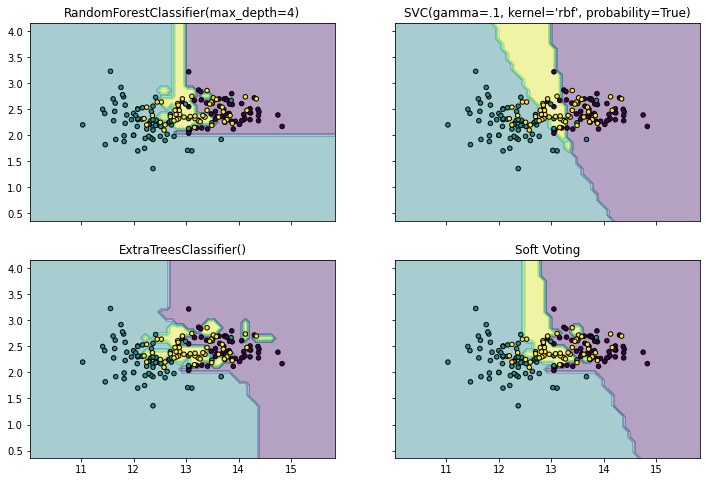

In [41]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, vote_model],
                          ['RandomForestClassifier(max_depth=4)',"SVC(gamma=.1, kernel='rbf', probability=True)", 'ExtraTreesClassifier()', 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

- cancer

In [42]:
X = cancer.data[:, [0,2]]
y = cancer.target

In [43]:
model1 = RandomForestClassifier(max_depth=4)
model2 = SVC(gamma=.1, kernel='rbf', probability=True)
model3 = ExtraTreesClassifier()
vote_model = VotingClassifier(estimators=[('rfc', model1), ('svc', model2), ('etc', model3)],
                              voting = 'soft')
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [44]:
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

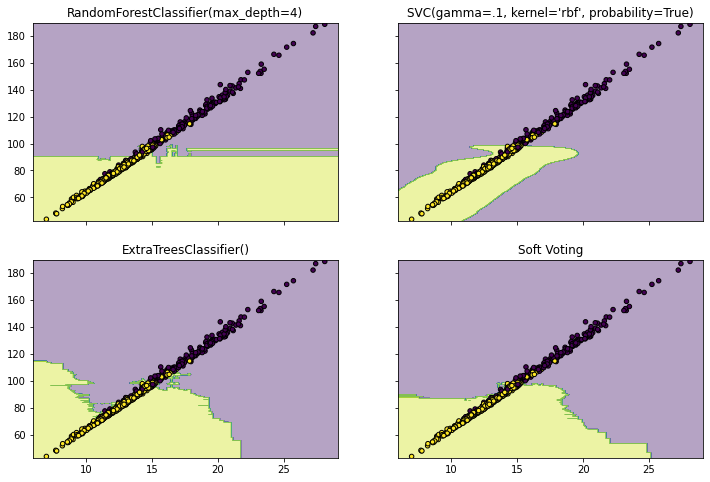

In [45]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, vote_model],
                          ['RandomForestClassifier(max_depth=4)',"SVC(gamma=.1, kernel='rbf', probability=True)", 'ExtraTreesClassifier()', 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

## VotingRegressor()

- diabetes

In [58]:
model1 = ExtraTreesRegressor()
model2 = SVR()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('etr',model1), ('svr', model2), ('rfr',model3)]
)

In [59]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, diabetes.data, diabetes.target, cv=5)
  print('R2: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

R2: 0.43 (+/- 0.05) [ExtraTreesRegressor]
R2: 0.15 (+/- 0.02) [SVR]
R2: 0.42 (+/- 0.06) [RandomForestRegressor]
R2: 0.41 (+/- 0.03) [VotingRegressor]


### 회귀식 시각화

In [60]:
X = diabetes.data[:, 0].reshape(-1,1)
y = diabetes.target

In [61]:
model1 = ExtraTreesRegressor()
model2 = SVR()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('etr',model1), ('svc', model2), ('rfr',model3)]
)
model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [62]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

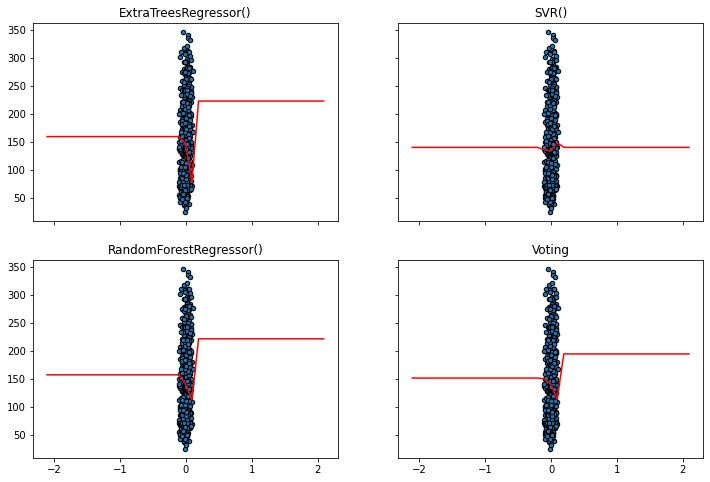

In [64]:
f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['ExtraTreesRegressor()', 'SVR()', 'RandomForestRegressor()', 'Voting']):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

- diabetes

In [65]:
estimators = [('rfr', RandomForestRegressor()),
              ('etr', ExtraTreesRegressor()),
              ('svr', SVR())]

In [69]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator = KNeighborsRegressor()
    )
)

In [70]:
cross_val = cross_validate(
    estimator = reg,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 2.338942813873291 (+/- 0.030619170381727717)
avg score time: 0.017569923400878908 (+/- 0.0005222474507639457)
avg test score: 0.3543979996401074 (+/- 0.09341630400453414)


#### 회귀식 시각화

In [71]:
X = diabetes.data[:, 0].reshape(-1,1)
y = diabetes.target

In [73]:
model1 = RandomForestRegressor()
model2 = ExtraTreesRegressor()
model3 = SVR()
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator = KNeighborsRegressor()
    )
)
model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
reg = reg.fit(X,y)

In [74]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

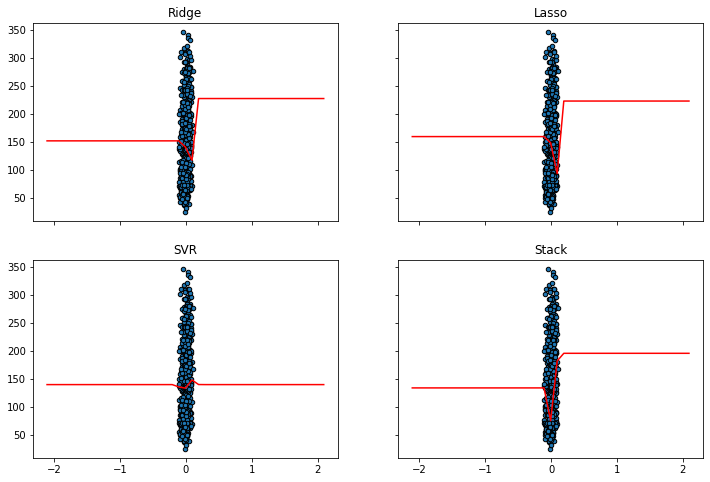

In [75]:
f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0, 1]),
                          [model1, model2, model3, reg],
                          ['Ridge', 'Lasso', 'SVR', 'Stack']):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

- wine

In [76]:
estimators = [('rfc', RandomForestClassifier()),
               ('svc', SVC()),
               ('etc', ExtraTreesClassifier())]

In [77]:
clf = StackingClassifier(
    estimators =estimators,
    final_estimator = KNeighborsClassifier()
)

In [78]:
cross_val = cross_validate(
    estimator = clf,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 1.4034523487091064 (+/- 0.011144537992393755)
avg score time: 0.018723821640014647 (+/- 0.0005402035657802771)
avg test score: 0.9609523809523811 (+/- 0.03763411392091285)


- cancer

In [79]:
estimators = [('rfc', RandomForestClassifier()),
               ('svc', SVC()),
               ('etc', ExtraTreesClassifier())]

In [80]:
clf = StackingClassifier(
    estimators =estimators,
    final_estimator = KNeighborsClassifier()
)

In [81]:
cross_val = cross_validate(
    estimator = clf,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 1.8095878124237061 (+/- 0.01677220152555467)
avg score time: 0.023388099670410157 (+/- 0.0027577904207109548)
avg test score: 0.956078248719143 (+/- 0.019190370732040156)


#### 결정 경계 시각화

- wine

In [82]:
X = wine.data[:, [0,2]]
y = wine.target

In [83]:
model1 = RandomForestClassifier()
model2 = SVC()
model3 = ExtraTreesClassifier()
stack = StackingClassifier(
    estimators = estimators,
    final_estimator = KNeighborsClassifier()
)
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [84]:
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

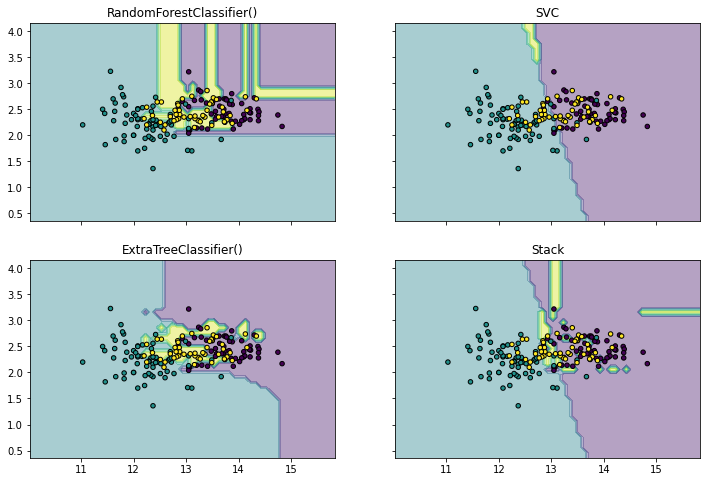

In [85]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, stack],
                          ['RandomForestClassifier()','SVC', 'ExtraTreeClassifier()', 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

- cancer

In [86]:
X = cancer.data[:, [0,2]]
y = cancer.target

In [87]:
model1 = RandomForestClassifier()
model2 = SVC()
model3 = ExtraTreesClassifier()
stack = StackingClassifier(
    estimators = estimators,
    final_estimator = KNeighborsClassifier()
)
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [88]:
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

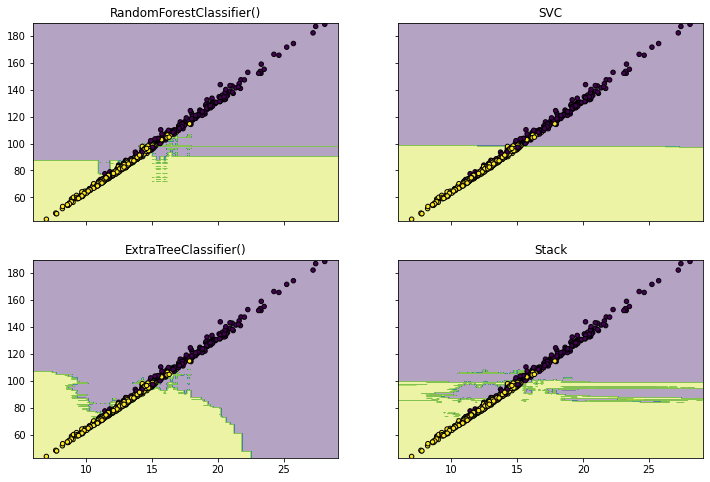

In [89]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, stack],
                          ['RandomForestClassifier()','SVC', 'ExtraTreeClassifier()', 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()